<a href="https://colab.research.google.com/github/dqniellew1/NFT_pricing_model/blob/main/Penguins_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style

import datetime

%matplotlib inline

## Analysis

In [ ]:
# Read data
pengus = pd.read_csv('data.csv')

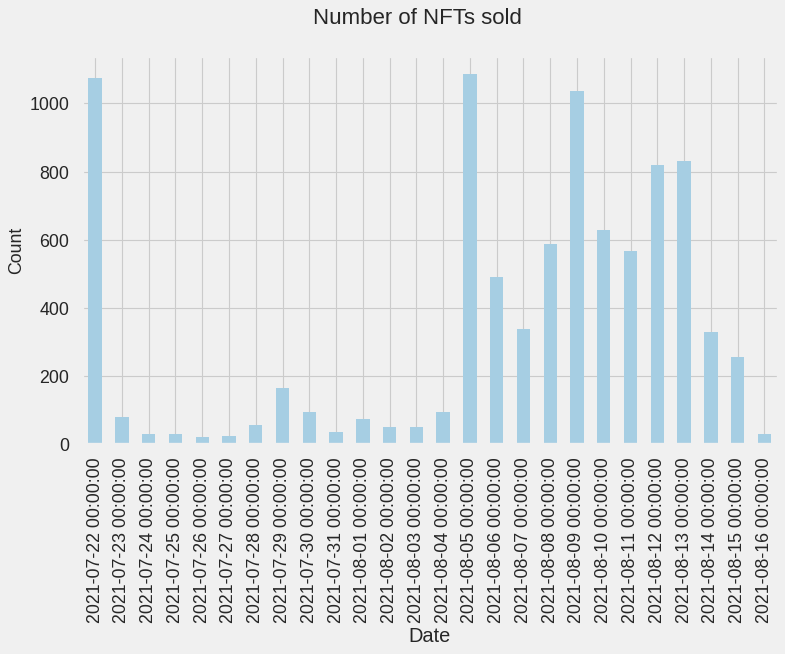

In [ ]:
# num_sold_by_day
style.use('seaborn-bright')
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
fig.suptitle('Number of NFTs sold', fontsize=20)
pengus.sort_values('last_sold_date').groupby('last_sold_date')['num_sales'].count().plot.bar(colormap='Paired')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.show()

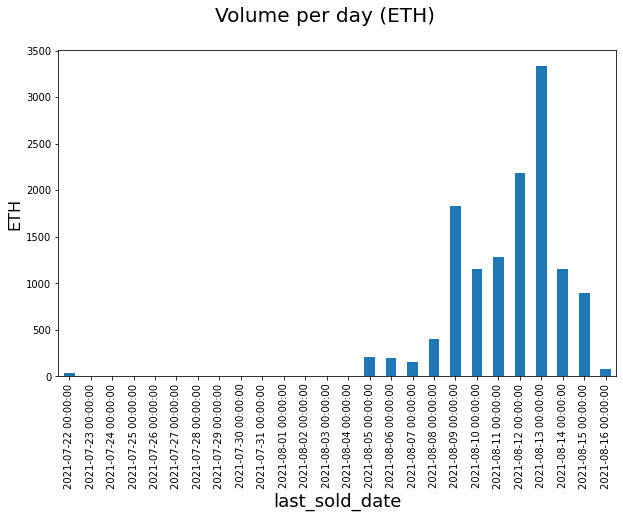

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Volume per day (ETH) ', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('ETH', fontsize=16)
pengus.sort_values('last_sold_date').groupby('last_sold_date')['last_sold_eth'].sum().plot.bar()
plt.show()

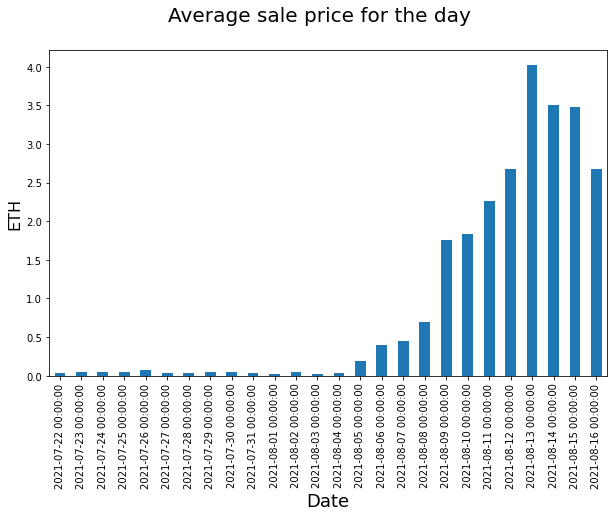

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Average sale price for the day', fontsize=20)
plt.ylabel('ETH', fontsize=16)
pengus.sort_values('last_sold_date').groupby('last_sold_date')['last_sold_eth'].mean().plot.bar()
plt.xlabel('Date', fontsize=18)

plt.show()

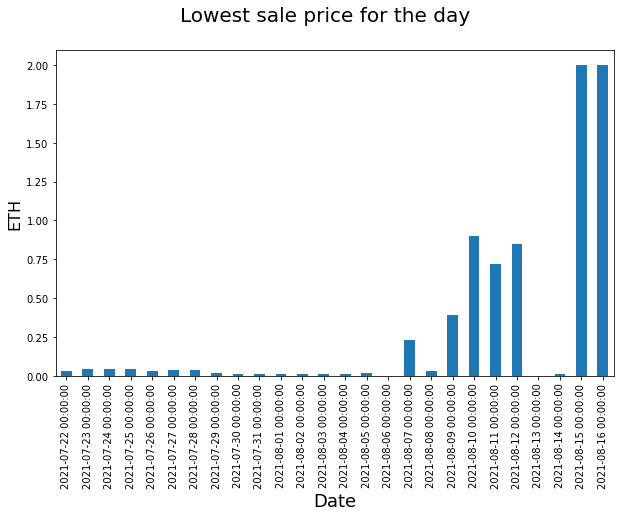

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Lowest sale price for the day', fontsize=20)
plt.ylabel('ETH', fontsize=16)
pengus.sort_values('last_sold_date').groupby('last_sold_date')['last_sold_eth'].min().plot.bar()
plt.xlabel('Date', fontsize=18)
plt.show()

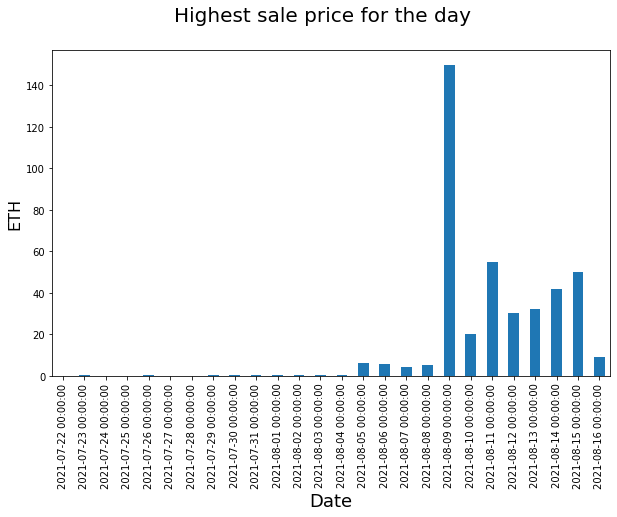

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Highest sale price for the day', fontsize=20)
plt.ylabel('ETH', fontsize=16)
pengus.sort_values('last_sold_date').groupby('last_sold_date')['last_sold_eth'].max().plot.bar()
plt.xlabel('Date', fontsize=18)
plt.show()

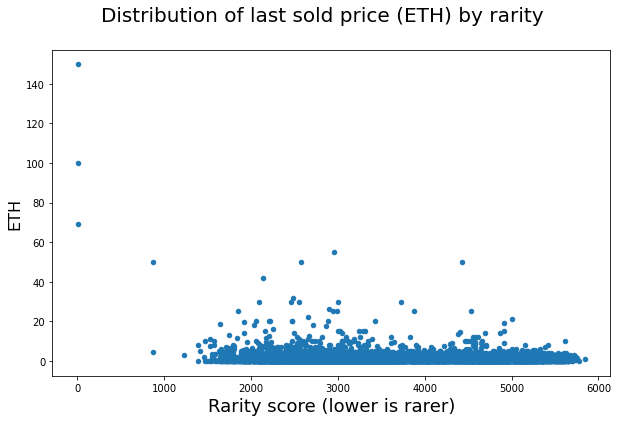

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Distribution of last sold price (ETH) by rarity', fontsize=20)
pengus.sort_values('rarity_score').plot.scatter(x='rarity_score', y='last_sold_eth', ax=ax)
plt.ylabel('ETH', fontsize=16)
plt.xlabel('Rarity score (lower is rarer)', fontsize=18)
plt.show()

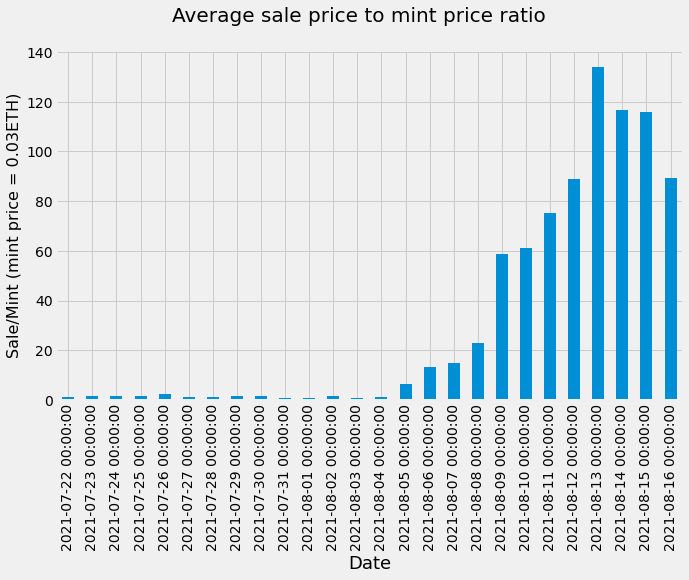

In [ ]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Average sale price to mint price ratio', fontsize=20)
plt.ylabel('Sale/Mint (mint price = 0.03ETH)', fontsize=16)
pengus.sort_values('last_sold_date').groupby('last_sold_date')['mint_multiple'].mean().plot.bar()
plt.xlabel('Date', fontsize=18)
plt.show()

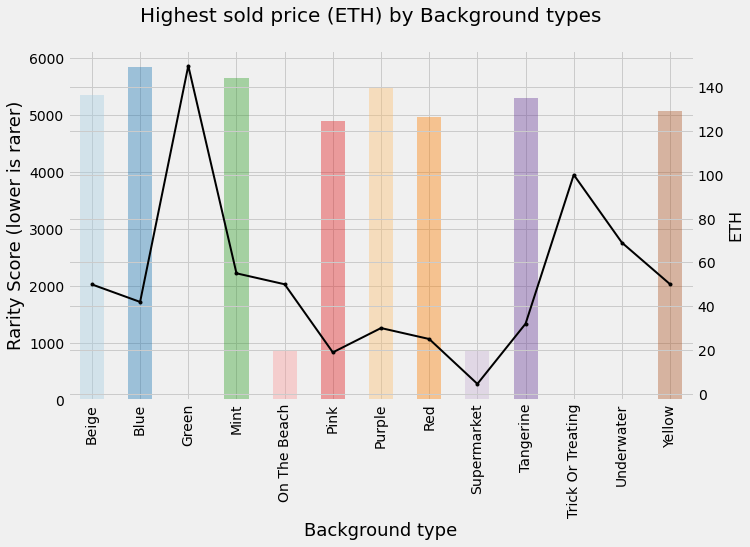

In [ ]:
style.use('seaborn-bright')
bg = pengus[['rarity_score', 'last_sold_eth', 'Background']].groupby(['Background']).max()

fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Highest sold price (ETH) by Background types', fontsize=20)

ax1 = ax.twinx()
plt.xticks(rotation=45, fontsize=14)

ax = bg['rarity_score'].plot.bar(ax=ax, alpha=0.4, label='index', color=plt.cm.Paired(np.arange(len(bg))))
ax1 = bg['last_sold_eth'].plot.line(ax=ax1,secondary_y=True, color='black', lw=2, style='.-')
ax.set_ylabel('Rarity Score (lower is rarer)', fontsize=18)
ax1.set_ylabel('ETH', fontsize=16)
ax.set_xlabel('Background type', fontsize=18)

plt.show()

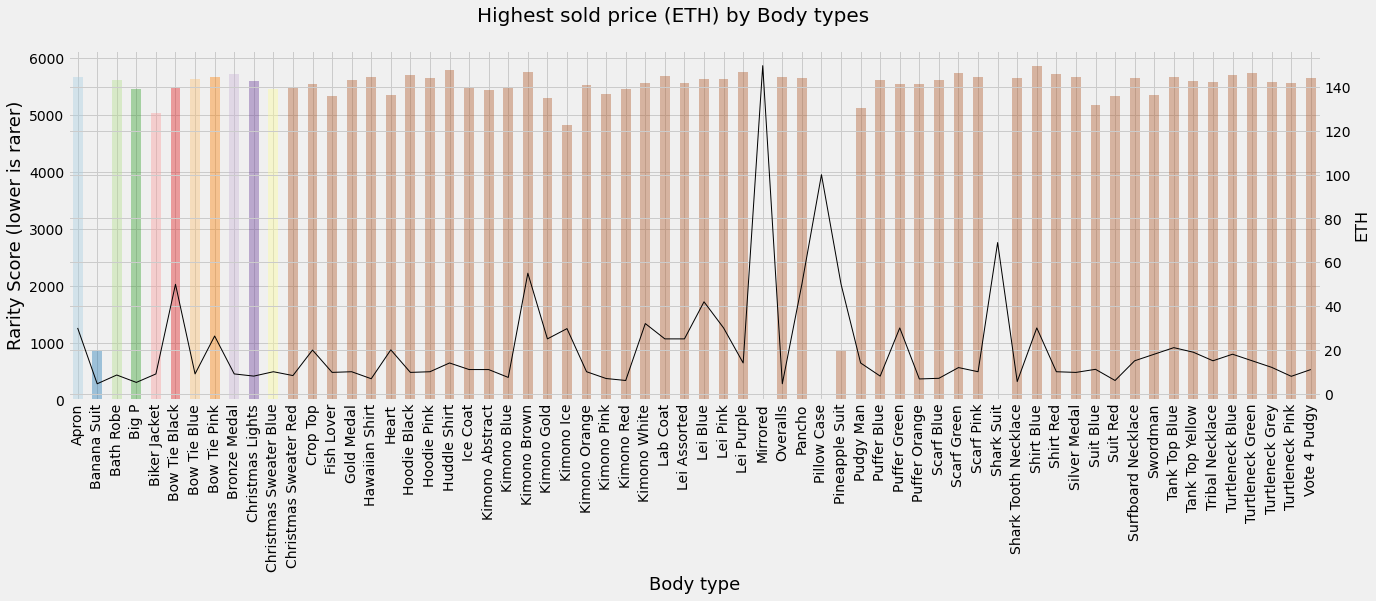

In [ ]:
Body = pengus[['rarity_score', 'last_sold_eth', 'Body']].groupby(['Body']).max()

fig, ax = plt.subplots(figsize=(20, 6))
fig.suptitle('Highest sold price (ETH) by Body types', fontsize=20)

ax1 = ax.twinx()
plt.xticks(rotation=45, fontsize=14)

ax = Body['rarity_score'].plot.bar(ax=ax, alpha=0.4, label='index', color=plt.cm.Paired(np.arange(len(Body))))
ax1 = Body['last_sold_eth'].plot.line(ax=ax1,secondary_y=True, color='black', lw=1)
ax.set_ylabel('Rarity Score (lower is rarer)', fontsize=18)
ax1.set_ylabel('ETH', fontsize=16)
ax.set_xlabel('Body type', fontsize=18)
plt.show()

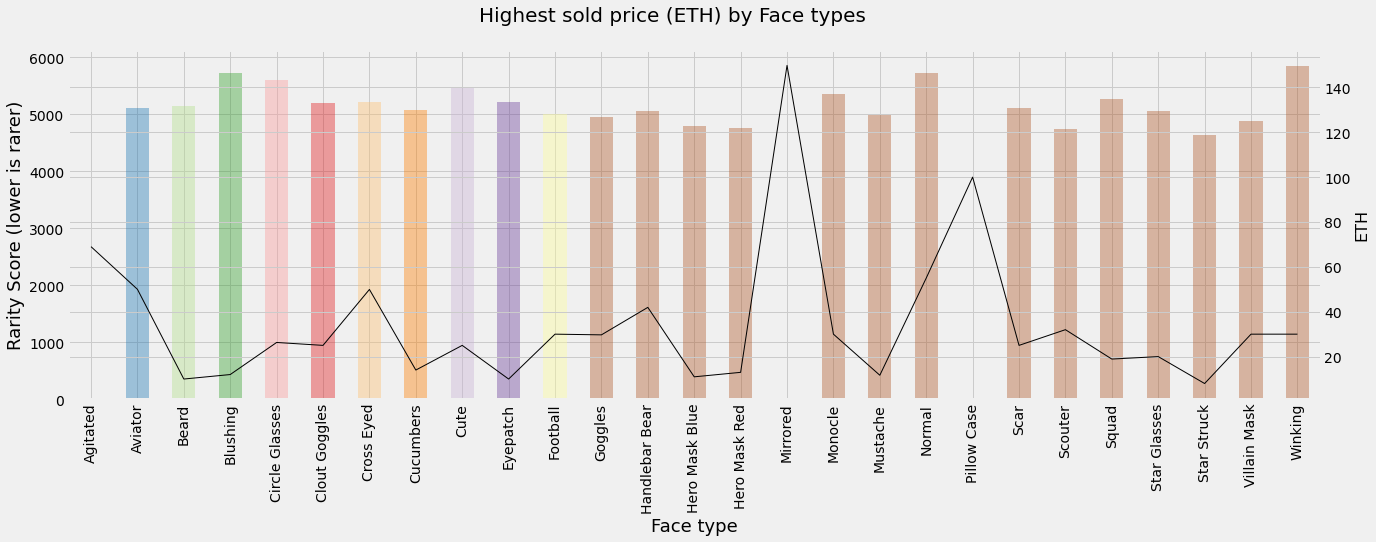

In [ ]:
Face = pengus[['rarity_score', 'last_sold_eth', 'Face']].groupby(['Face'], sort=True).max()

fig, ax = plt.subplots(figsize=(20, 6))
fig.suptitle('Highest sold price (ETH) by Face types', fontsize=20)

ax1 = ax.twinx()
plt.xticks(rotation=45, fontsize=14)

ax = Face['rarity_score'].plot.bar(ax=ax, alpha=0.4, label='index', color=plt.cm.Paired(np.arange(len(Face))))
ax1 = Face['last_sold_eth'].plot.line(ax=ax1,secondary_y=True, color='black', lw=1)
ax.set_ylabel('Rarity Score (lower is rarer)', fontsize=18)
ax1.set_ylabel('ETH', fontsize=16)
ax.set_xlabel('Face type', fontsize=18)
plt.show()

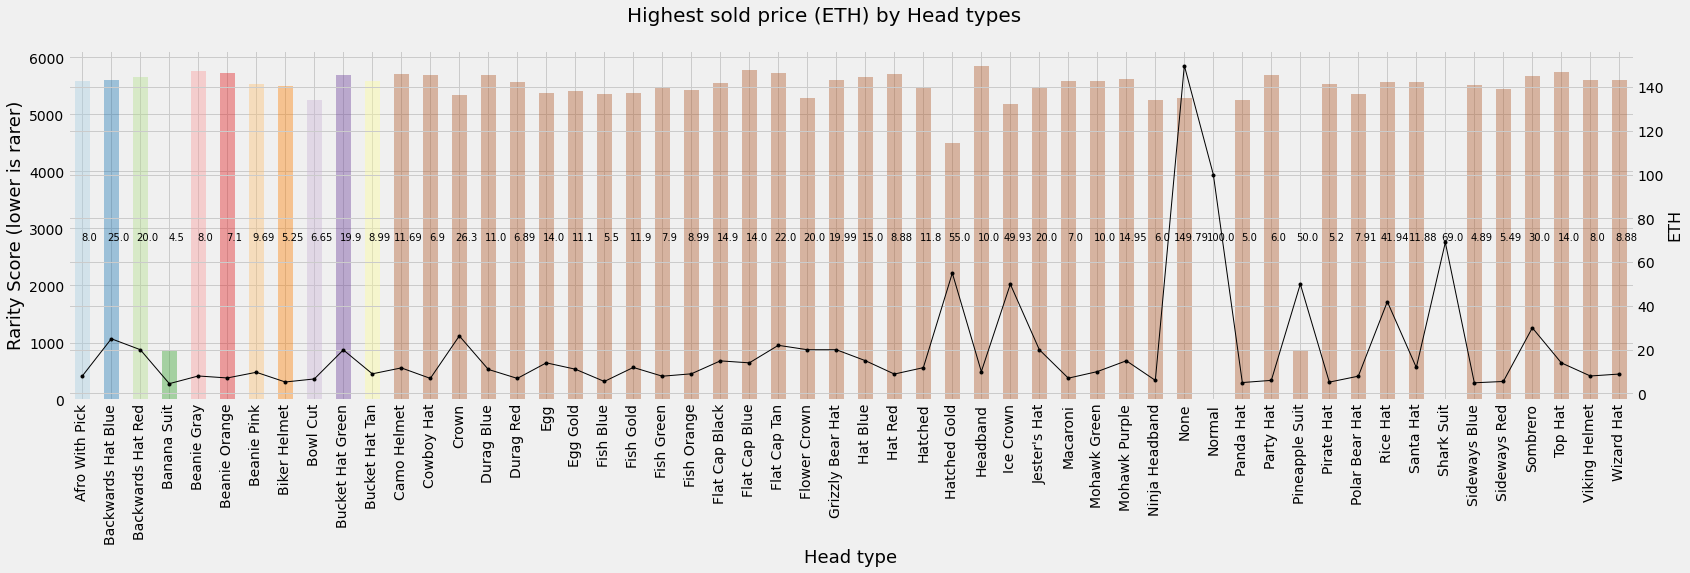

In [ ]:
Head = pengus[['rarity_score', 'last_sold_eth', 'Head']].groupby(['Head']).max()

fig, ax = plt.subplots(figsize=(25, 6))
fig.suptitle('Highest sold price (ETH) by Head types', fontsize=20)

ax1 = ax.twinx()
plt.xticks(rotation=45, fontsize=14)

ax = Head['rarity_score'].plot.bar(ax=ax, alpha=0.4, label='index', color=plt.cm.Paired(np.arange(len(Head))))
ax1 = Head['last_sold_eth'].plot.line(ax=ax1,secondary_y=True, color='black', lw=1, style='.-')
ax.set_ylabel('Rarity Score (lower is rarer)', fontsize=18)
ax1.set_ylabel('ETH', fontsize=16)
ax.set_xlabel('Head type', fontsize=18)

rects = ax.patches
for rect, label in zip(rects, Head['last_sold_eth'].round(2)):
    x = rect.get_x() + rect.get_width()
    y = rect.get_y() + 70
    height = rect.get_height()
    plt.annotate(label, (x, y),size = 10, ha="center")
plt.show()

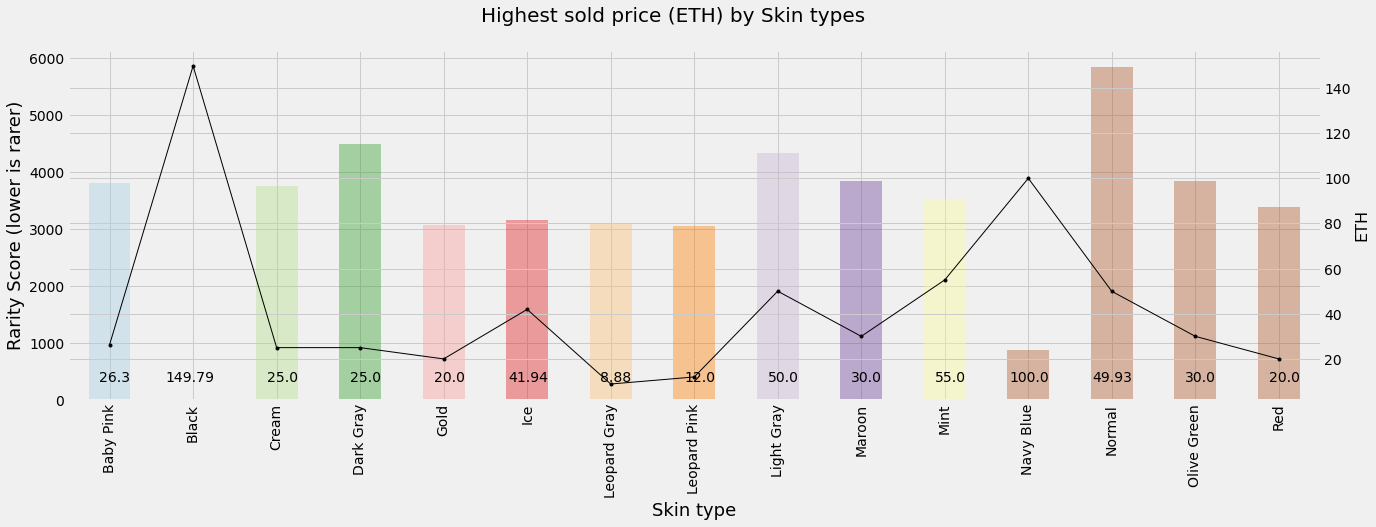

In [ ]:
Skin = pengus[['rarity_score','last_sold_eth', 'Skin']].groupby(['Skin']).max()

fig, ax = plt.subplots(figsize=(20, 6))
fig.suptitle('Highest sold price (ETH) by Skin types', fontsize=20)

ax1 = ax.twinx()
plt.xticks(rotation=45, fontsize=14)

ax = Skin['rarity_score'].plot.bar(ax=ax, alpha=0.4, label='index', color=plt.cm.Paired(np.arange(len(Skin))))
ax1 = Skin['last_sold_eth'].plot.line(ax=ax1,secondary_y=True, color='black', lw=1, style='.-')
ax.set_ylabel('Rarity Score (lower is rarer)', fontsize=18)

rects = ax.patches
for rect, label in zip(rects, Skin['last_sold_eth'].round(2)):
    x = rect.get_x() + rect.get_width()
    y = rect.get_y() + 10
    height = rect.get_height()
    plt.annotate(label, (x, y),size = 14, ha="right")

ax1.set_ylabel('ETH', fontsize=16)
ax.set_xlabel('Skin type', fontsize=18)
plt.show()